# Crear un modelo de Word2Vec

Este ejemplo esta disponible con extencion 
- __.py__ para ser cargado desde cualquier IDE (Pychar, Spyder, etc) 
- __.ipynb__ para notebook

Requerimientos:
- NLTK: Installar ejecutar el comando __pip install nltk__
- Gensim: Instalar con __pip install gensim__

In [1]:
#!pip install spacy

You are using pip version 9.0.1, however version 20.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
#importamos otra libreria importante para tokenizar en oraciones
import spacy

In [2]:
!python -m spacy download es_core_news_sm

[+] Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


You are using pip version 9.0.1, however version 20.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
#cargamos la biblioteca en español
nlp= spacy.load('es_core_news_sm')
#en este punto se tiene que reiniciar todo y ejecutar de nuevo

In [4]:
import nltk
import gensim

In [ ]:
#Descomenta las dos siguientes lineas si no tienes instalado nltk y/o gensim
#! pip install nltk 
#! pip install gensim

# Leer Corpus

In [5]:
with open ('orasi.txt',
           'r',encoding='utf-8') as file:
        document = file.read()

In [9]:
doc = nlp(document) #aplicamos la bibliotea a mi texto

In [12]:
#Para tokenizar oraciones
oraciones_lista = []
separator = ','
doc=nlp(document)
for num,oracion in enumerate(doc.sents):
    #print(f'{num}: {oracion}')
    oraciones_lista.append(oracion)

In [73]:
#4# mio
#Funcion Tokenizar
def tokenizar(texto_para_tonekizar):
  from nltk.tokenize import word_tokenize #importar la parte tokenizadora
  salida_funcion_tok = word_tokenize(texto_para_tonekizar,"spanish") #secciona o tokeniza
  salida_funcion_tok =[word.lower() for word in salida_funcion_tok if word.isalpha()] # Remover los signos de puntuación
  return(salida_funcion_tok)

In [74]:
#mio tokenizar palabras 
texto_tokenizado=tokenizar(document)

In [76]:
texto_tokenizado

['producto',
 'llegó',
 'responden',
 'correos',
 'peor',
 'contestan',
 'correos',
 'mando',
 'compren',
 'recomiendo',
 'puede',
 'devolver',
 'ser',
 'producto',
 'alimenticio',
 'general',
 'mala',
 'experiencia',
 'cafe',
 've',
 'fecha',
 'lote',
 'ningun',
 'lado',
 'cobraron',
 'pesos',
 'producto',
 'llegó',
 'demasiado',
 'molesta',
 'mandaron',
 'paquete',
 'caduca',
 'noviembre',
 'osea',
 'prácticamente',
 'falta',
 'mes',
 'mal',
 'vuelvo',
 'comprar',
 'hice',
 'reclamación',
 'enviaron',
 'frasco',
 'repuesto',
 'muele',
 'perfectamente',
 'máquina',
 'filtro',
 'goteo',
 'puede',
 'ser',
 'totalmente',
 'adecuado',
 'lastima',
 'pueda',
 'además',
 'compré',
 'perdió',
 'devolución',
 'intento',
 'llegó',
 'mal',
 'etiqueta',
 'sobrepuesta',
 'cumplió',
 'descrito',
 'recomiendo',
 'comprar',
 'café',
 'directamente',
 'tienda',
 'internet',
 'así',
 'sabe',
 'compra',
 'amazon',
 'permiten',
 'devoluciones',
 'aunque',
 'pague',
 'membresía',
 'llego',
 'pedi',
 'reem

In [17]:
oraciones_lista[1]

ser
mas
especifico
imágenes
favor
marca
si
sola
mas
reconocidas
cuanto
cafe
refiere
probablemente
voy
volver
surtir
meses
menos
adderall
ayuda
vyvanse
ayuda
liso
regusto
precio

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [7]:

from gensim.models import Word2Vec


# Modelo de W2V

In [8]:
frases=[["café", "es", "bueno"],
        ["café", "con", "sabor"],
        ["café", "con", "aroma"],
        ["aroma", "es", "dulce"],
        ["café", "con", "sabor"],
        ["dulce", "y", "amargo"],
        ["café", "con", "sabor"],
        ["saborear","el","café"],
        ["saborear","café"],
        ["aroma","del","café"],
        ["aroma","café","cuerpo"],
        ["tener","cuerpo"],
        ["el","sabor","es","amargo"],
        ["de","amargo","sabor"],
        ["el","sabor","es","amargo"],
        ["el","no","es" ,"sabor","amargo"]
       ]

In [9]:
nltk.download('punkt') #parte para tokenizar
nltk.download('stopwords') #parte para stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Armando\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Armando\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#5#
#Funcion Quitar Stop Words
def quitarStopWords(texto_para_quitar_stop_words):
  from nltk.corpus import stopwords
  salida_sin_stop_words = texto_para_quitar_stop_words[:]
  for token in texto_para_quitar_stop_words:
     if token in stopwords.words('spanish'):
         salida_sin_stop_words.remove(token)
  return(salida_sin_stop_words)

In [13]:
frases_n=quitarStopWords(frases[5])

In [35]:
largo=len(frases)

frases_n=[]
for i in range(0,largo):
    nueva_frase=quitarStopWords(frases[i])
    frases_n.append(nueva_frase)

In [36]:
frases_n

[['café', 'bueno'],
 ['café', 'sabor'],
 ['café', 'aroma'],
 ['aroma', 'dulce'],
 ['café', 'sabor'],
 ['dulce', 'amargo'],
 ['café', 'sabor'],
 ['saborear', 'café'],
 ['saborear', 'café'],
 ['aroma', 'café'],
 ['aroma', 'café', 'cuerpo'],
 ['tener', 'cuerpo'],
 ['sabor', 'amargo'],
 ['amargo', 'sabor'],
 ['sabor', 'amargo'],
 ['sabor', 'amargo']]

In [46]:
modelo = Word2Vec(frases_n,min_count=1)

In [47]:
words = list(modelo.wv.vocab)
print(words)

['café', 'bueno', 'sabor', 'aroma', 'dulce', 'amargo', 'saborear', 'cuerpo', 'tener']


In [48]:
modelo.most_similar('café')

C:\Users\Armando\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('cuerpo', 0.2379399836063385),
 ('tener', 0.18287315964698792),
 ('aroma', 0.12522268295288086),
 ('saborear', -0.0007303804159164429),
 ('sabor', -0.007121287286281586),
 ('dulce', -0.012767143547534943),
 ('bueno', -0.015695106238126755),
 ('amargo', -0.01876172050833702)]

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [49]:
from sklearn.decomposition import PCA #Para Graficar PCA functions

In [50]:
palabras333=['café','bueno','sabor','aroma', 'dulce','amargo', 'saborear','cuerpo']
modelo_aplicado=modelo[palabras333]

C:\Users\Armando\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [51]:
# Transformar modelo 2d
X = modelo_aplicado
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [52]:
import matplotlib.pyplot as plt #importamos para graficos

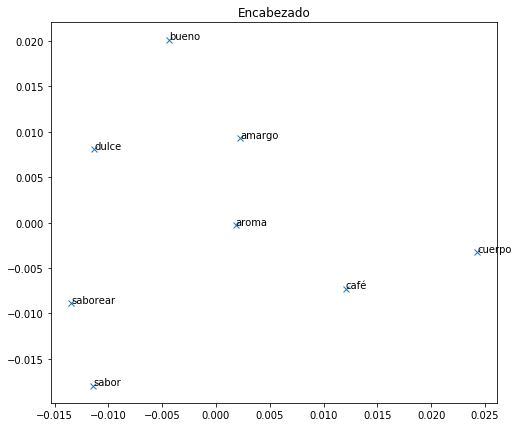

In [53]:
# create a plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(8, 7)
ax.plot(result[:, 0], result[:, 1], 'x')
ax.set_title('Encabezado')


words = list(palabras333)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0],result[i, 1]))

plt.show()